In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
df = pd.read_csv('Google_train_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
df["Close"]=pd.to_numeric(df.Close,errors='coerce')
df = df.dropna()
trainData = df.iloc[:,4:5].values

In [5]:
scale = MinMaxScaler(feature_range=(0,1))
trainData = scale.fit_transform(trainData)
trainData.shape

(1149, 1)

In [6]:
X_train = []
Y_train = []

for i in range (60,1149): #60 : timestep // 1149: length of the data
    X_train.append(trainData[i-60:i,0]) 
    Y_train.append(trainData[i,0])

X_train,Y_train = np.array(X_train),np.array(Y_train)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [8]:
sqmodel = Sequential()

sqmodel.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
sqmodel.add(Dropout(0.2))

sqmodel.add(LSTM(units=100, return_sequences = True))
sqmodel.add(Dropout(0.2))

sqmodel.add(LSTM(units=100, return_sequences = True))
sqmodel.add(Dropout(0.2))

sqmodel.add(LSTM(units=100, return_sequences = False))
sqmodel.add(Dropout(0.2))

sqmodel.add(Dense(units =1))
sqmodel.compile(optimizer='adam',loss="mean_squared_error")

In [9]:
histogram = sqmodel.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0456 - 14s/epoch - 402ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0138 - 5s/epoch - 150ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0102 - 5s/epoch - 150ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0087 - 5s/epoch - 151ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0093 - 5s/epoch - 153ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0077 - 5s/epoch - 157ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0070 - 6s/epoch - 171ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0065 - 6s/epoch - 170ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0087 - 6s/epoch - 164ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0066 - 6s/epoch - 164ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0063 - 6s/epoch - 160ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0062 - 6s/epoch - 171ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0063 - 6s/epoch - 169ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0055 - 6s/epoch - 164ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0054 - 6s/epoch - 162ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 155ms/step
Epoch 17/20
35/

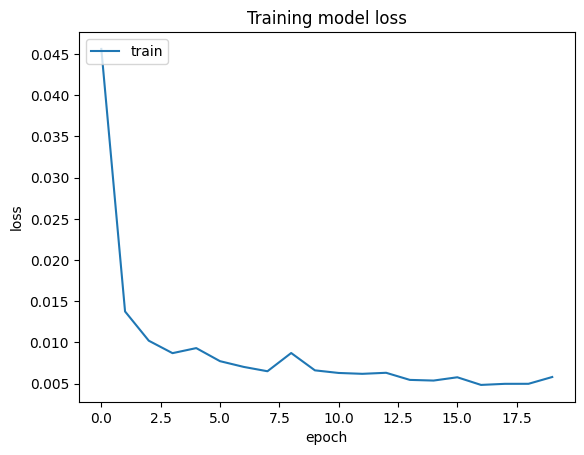

In [10]:
plt.plot(histogram.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = scale.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = sqmodel.predict(X_test)
y_pred

6/6 [==============================] - 2s 57ms/step


array([[1.195103 ],
       [1.1979507],
       [1.2084122],
       [1.2243755],
       [1.2381519],
       [1.2402432],
       [1.2300363],
       [1.2139244],
       [1.2020211],
       [1.1973016],
       [1.1904591],
       [1.180099 ],
       [1.1704297],
       [1.1613548],
       [1.1584082],
       [1.1615795],
       [1.1770456],
       [1.202785 ],
       [1.233459 ],
       [1.2648015],
       [1.2800418],
       [1.2799022],
       [1.2630705],
       [1.236434 ],
       [1.2105196],
       [1.1937476],
       [1.1875687],
       [1.1857014],
       [1.1793678],
       [1.1698576],
       [1.1589534],
       [1.1463544],
       [1.1278987],
       [1.1048772],
       [1.0935426],
       [1.0995088],
       [1.1180487],
       [1.1413012],
       [1.164651 ],
       [1.1784377],
       [1.1913574],
       [1.2058789],
       [1.2223301],
       [1.2379143],
       [1.2490152],
       [1.2515533],
       [1.243616 ],
       [1.2350801],
       [1.2314804],
       [1.2352606],


In [15]:
predicted_price = scale.inverse_transform(y_pred)

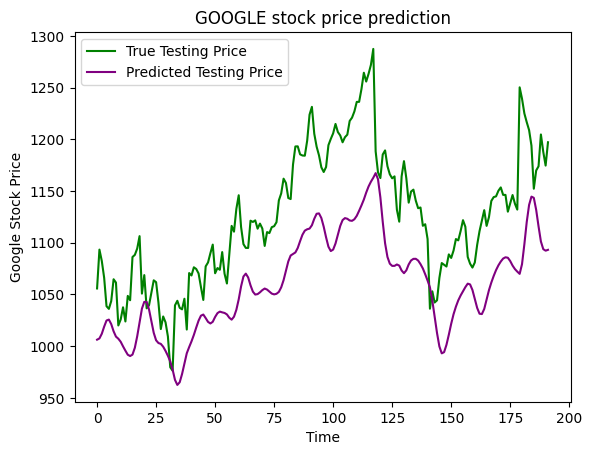

In [16]:
plt.plot(y_test, color = 'green', label = 'True Testing Price')
plt.plot(predicted_price, color = 'purple', label = 'Predicted Testing Price')
plt.title('GOOGLE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()